In [1]:
#05_panda_08_20160815, Summarizing and Computing Descriptive Statistics

In [2]:
from pandas import DataFrame,Series #import DataFrame(), Series()

In [3]:
import pandas as pd #慣例

In [4]:
import numpy as np #import numpy as np

In [5]:
import matplotlib.pyplot as plt #for drawing

In [6]:
%matplotlib inline

In [7]:
#example 1:

In [8]:
df1=DataFrame([[1.4,np.nan],[7.1,-4.5],[np.nan,np.nan],[0.75,-1.3]],
            index=list('abcd'),
            columns=['one','two'])

In [9]:
df1 #DataFrame Object df1

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [10]:
#DataFrame.sum() method

In [11]:
df1.sum() #預設沿軸axis=0 方向(column方向) 加總

one    9.25
two   -5.80
dtype: float64

In [12]:
df1.sum(axis=1) #沿軸axis=1方向加總,每一 index 一個結果
                #注意!, NaN 處理方式與舊版不同, 以0值取代

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [13]:
df1.mean(axis=0) #預設skipna=True,自動排除NaN

one    3.083333
two   -2.900000
dtype: float64

In [14]:
df1.mean(axis=0,skipna=False) #不排除NaN時

one   NaN
two   NaN
dtype: float64

In [15]:
#idxmax(), idxmin(), return indirect statistics like the index value
#回傳的是最大(小)值所在索引

In [16]:
np.random.randn(4,4) #np.random.randn() function

array([[-1.07132629,  1.79089758,  1.3781197 ,  0.07242728],
       [-0.82857127, -0.45211205,  0.29507515, -0.5396022 ],
       [-0.57825758,  0.39989246, -1.22573754, -1.16141575],
       [ 0.05294963, -0.42567408, -1.89104692,  0.50365152]])

In [17]:
df2=DataFrame(np.random.randn(4,4),
              columns=list('甲乙丙丁'),
              index=list('abcd'))

In [18]:
df2

,甲,乙,丙,丁
a,1.464998,-0.337598,0.264937,1.154966
b,-0.733899,0.776891,0.071655,0.723463
c,-0.742842,0.767948,-1.119809,-0.819765
d,1.034121,0.315303,0.354259,-1.336423


In [19]:
df2.idxmax(axis=0) #每個column最大值的 index

甲    a
乙    b
丙    d
丁    a
dtype: object

In [20]:
df2.max(axis=0) #每個column最大值

甲    1.464998
乙    0.776891
丙    0.354259
丁    1.154966
dtype: float64

In [21]:
df2.idxmin(axis=1) #每個index 最小值的 column

a    乙
b    甲
c    丙
d    丁
dtype: object

In [22]:
df2.min(axis=1) #每個index 最小值

a   -0.337598
b   -0.733899
c   -1.119809
d   -1.336423
dtype: float64

In [23]:
#練習: 使用zip() 迭代

In [24]:
for c,x,y in zip(df2.columns,df2.idxmax(axis=0).values,df2.max(axis=0).values):
    print(c,'最大值位置:',x, '最大值:',y)

甲 最大值位置: a 最大值: 0.189125478923
乙 最大值位置: a 最大值: 0.824762016273
丙 最大值位置: d 最大值: 1.54596261331
丁 最大值位置: c 最大值: 0.301454522354


In [25]:
#練習解答說明:

In [26]:
s1=df2.idxmax(axis=0)

In [27]:
s2=df2.max(axis=0)

In [28]:
for x in s2.values:
    print(x)

0.189125478923
0.824762016273
1.54596261331
0.301454522354


In [29]:
for y in s1.values:
    print(y)

a
a
d
c


In [30]:
df2.columns

Index(['甲', '乙', '丙', '丁'], dtype='object')

In [31]:
#DataFrame.cumsum() method 

In [32]:
df2=DataFrame(np.arange(16.0).reshape(4,4),
             index=list('abcd'),
             columns=list('甲乙丙丁'))

In [33]:
df2

,甲,乙,丙,丁
a,0.0,1.0,2.0,3.0
b,4.0,5.0,6.0,7.0
c,8.0,9.0,10.0,11.0
d,12.0,13.0,14.0,15.0


In [34]:
df2.cumsum(axis=0) #沿軸axis=0累加 

,甲,乙,丙,丁
a,0.0,1.0,2.0,3.0
b,4.0,6.0,8.0,10.0
c,12.0,15.0,18.0,21.0
d,24.0,28.0,32.0,36.0


In [35]:
df2.cumsum(axis=1) #沿軸axis=1累加(accumulations) 

,甲,乙,丙,丁
a,0.0,1.0,3.0,6.0
b,4.0,9.0,15.0,22.0
c,8.0,17.0,27.0,38.0
d,12.0,25.0,39.0,54.0


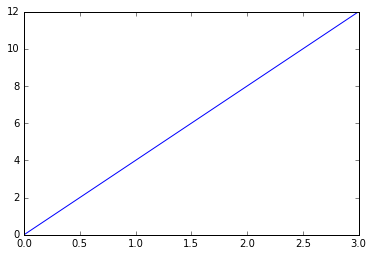

In [36]:
plt.plot(df2.cumsum(axis=1)['甲'].values)

In [37]:
#全能函數, DataFrame.describe() method

In [38]:
df3=DataFrame(np.random.randn(4,3),
              index=list('abcd'),
              columns=list('甲乙丙'))

In [39]:
df3

,甲,乙,丙
a,0.746946,-0.046286,1.541362
b,1.797289,0.035611,-0.614550
c,-0.798205,0.555204,1.957856
d,-0.127516,0.623531,1.709642


In [40]:
df3.describe()

,甲,乙,丙
count,4.000000,4.000000,4.000000
mean,0.404628,0.292015,1.148578
std,1.123487,0.346103,1.187802
min,-0.798205,-0.046286,-0.614550
25%,-0.295188,0.015136,1.002384
50%,0.309715,0.295407,1.625502
75%,1.009532,0.572286,1.771696
max,1.797289,0.623531,1.957856


In [41]:
df3.describe().T #將 df3.describe() 結果轉置

,count,mean,std,min,25%,50%,75%,max
甲,4.0,0.404628,1.123487,-0.798205,-0.295188,0.309715,1.009532,1.797289
乙,4.0,0.292015,0.346103,-0.046286,0.015136,0.295407,0.572286,0.623531
丙,4.0,1.148578,1.187802,-0.614550,1.002384,1.625502,1.771696,1.957856


In [42]:
df3.T.describe() #將 df3 轉置後, describe() 

,a,b,c,d
count,3.000000,3.000000,3.000000,3.000000
mean,0.747341,0.406117,0.571618,0.735219
std,0.793824,1.247877,1.378104,0.923658
min,-0.046286,-0.614550,-0.798205,-0.127516
25%,0.350330,-0.289470,-0.121500,0.248007
50%,0.746946,0.035611,0.555204,0.623531
75%,1.144154,0.916450,1.256530,1.166587
max,1.541362,1.797289,1.957856,1.709642


In [43]:
#如果DataFrame or Series 是 非數值

In [44]:
s_01=Series(list('aabc')*4)

In [45]:
s_01

0     a
1     a
2     b
3     c
4     a
5     a
6     b
7     c
8     a
9     a
10    b
11    c
12    a
13    a
14    b
15    c
dtype: object

In [46]:
s_01.describe()

count     16
unique     3
top        a
freq       8
dtype: object